<a href="https://colab.research.google.com/github/xtianu/docencia/blob/main/UT/Test/Tirana_CV_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computer Vision - Tirana May 2025
# Final Evaluation Exercise: Complete the following exercises

JOANIKIJ CHULEV

We load all needed libraries.

In [1]:
from skimage import data, img_as_uint, img_as_float, img_as_ubyte
from skimage.util import random_noise
from skimage.filters import gaussian, prewitt, median
from skimage.data import binary_blobs
from skimage.morphology import erosion, disk, label
from skimage.color import rgb2gray, label2rgb, rgb2lab
from skimage.transform import rescale
from skimage.feature import graycomatrix, graycoprops
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import estimate_bandwidth
from skimage import data, morphology, measure, color

## 1. Load and visualize the 'coins' image from the skimage built-in datasets. Report the size of the image and range of the pixel grayscale levels.

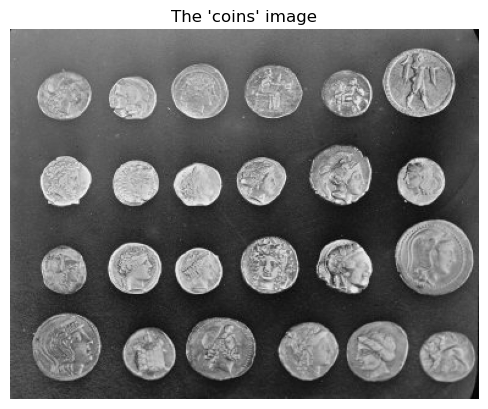

Image shape: (303, 384)
Pixel intensity range: 1 to 252


In [2]:
# Load the 'coins' image
coins = data.coins()

# Compute image properties
shape = coins.shape
min_val = coins.min()
max_val = coins.max()

# Visualize the image
plt.imshow(coins, cmap='gray')
plt.axis('off')
plt.title("The 'coins' image")
plt.show()

# Display computed properties
print(f"Image shape: {shape}")
print(f"Pixel intensity range: {min_val} to {max_val}")

## 2. Represent the histogram of the image. Explain the peaks of the histogram in terms of regions of the image.

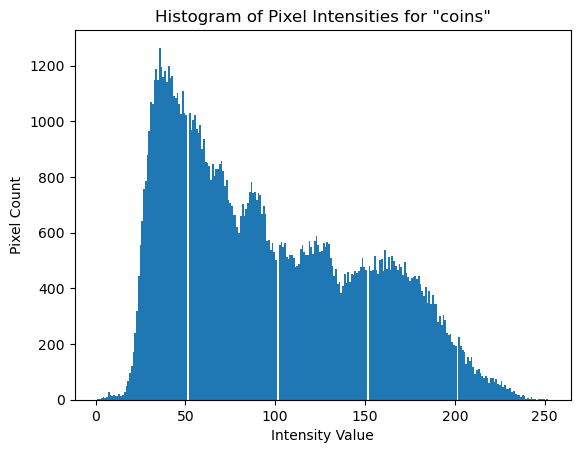

In [3]:
# Plot histogram
plt.figure()
plt.hist(coins.ravel(), bins=256)
plt.title('Histogram of Pixel Intensities for "coins"')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.show()


Here’s how we may interpret the values in terms of regions in the image:

Peak around intensity 30–40:
The tallest, sharpest peak appears at low gray levels (≈35–40). This corresponds to the largest-area region in the image—the dark background or tabletop on which the coins rest. Because it occupies most pixels outside the coins, its frequency dwarfs the others.

Broad hump from 50 up to 120:
A wide plateau or shoulder in the histogram spans roughly 50 to 120. These mid-range values capture the majority of each coin’s face such as engraved surfaces, shadows, and moderate lighting.

Secondary peak around 150:
A smaller but noticeable bump near intensity ≈160 corresponds to the brighter edges of the coins and regions catching more light—raised rims and bright reflections.

Tail from 180 up to 250:
The far right of the histogram shows a decaying tail of high-intensity pixels (up to the maximum of 252). These few hundred pixels are where the strong highlights occur on coin surfaces.

## 3. Applied noise to the image and use the correct function to erase the noise.

First we apply different filters of noise to showcase noise results. As we did in the Exercises.

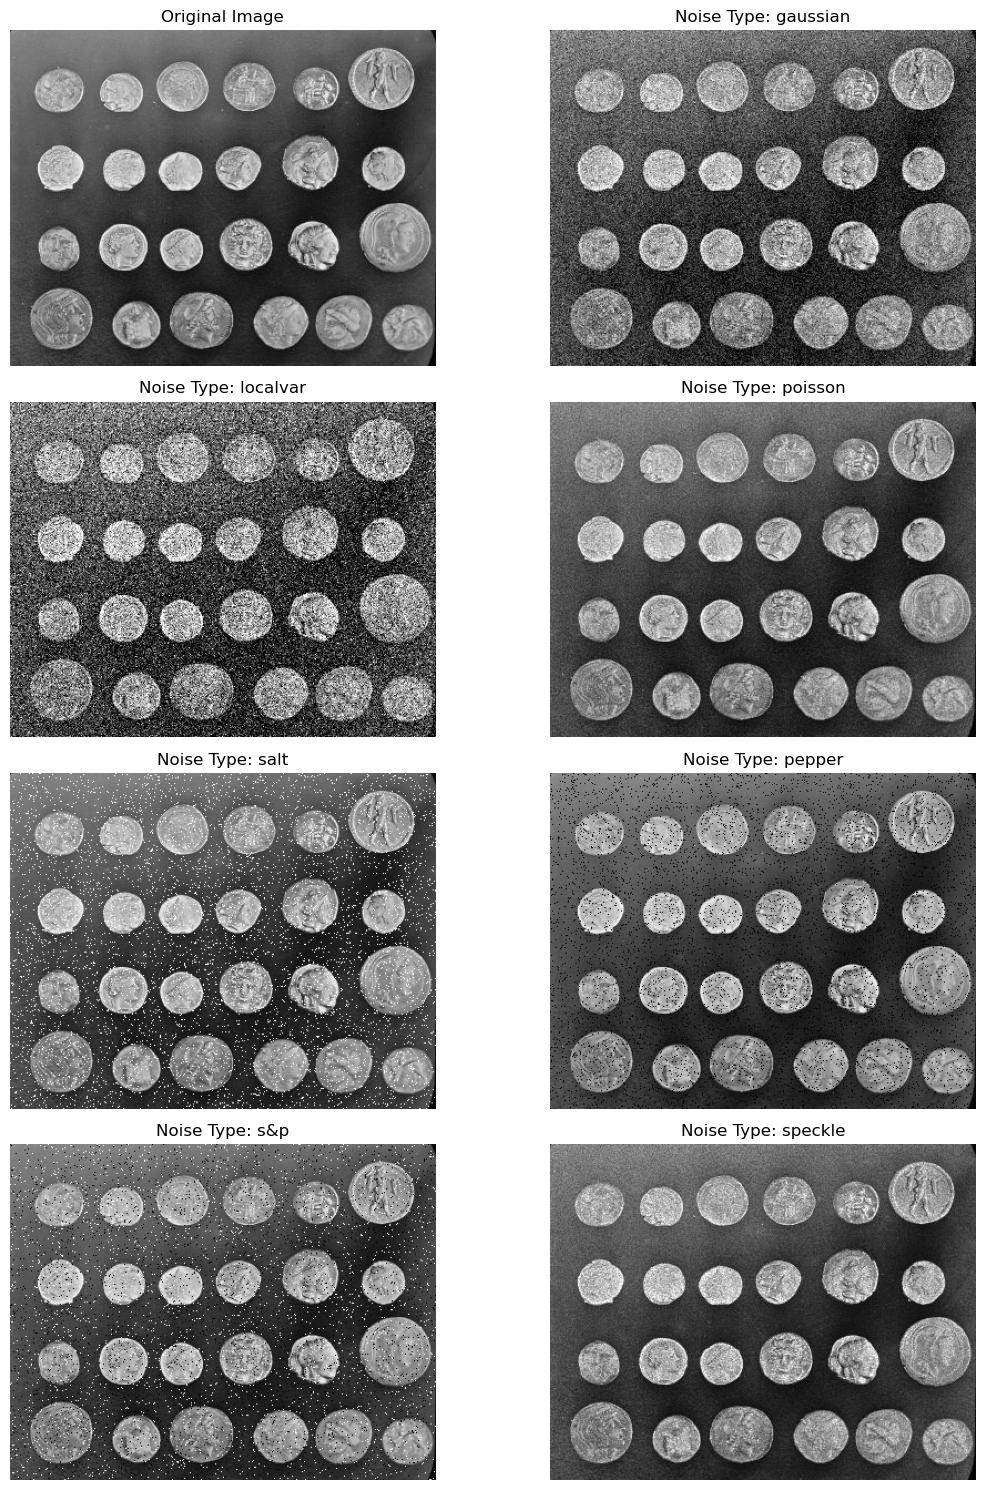

In [ ]:
noise_types = ['gaussian', 'localvar', 'poisson', 'salt', 'pepper', 's&p', 'speckle']
fig, axes = plt.subplots(4, 2, figsize=(12, 15))


axes[0, 0].imshow(coins, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

for i, noise_type in enumerate(noise_types):
    # Calculate the row and column index for the subplot
    row = (i + 1) // 2  # Start from the second row
    col = (i + 1) % 2

    # Add noise to the image using the specified mode
    if noise_type == 'localvar':
        # Generate localvar noise using a separate method
        local_variance = np.random.rand(*coins.shape) * 0.1
        noisy_image = random_noise(coins, mode='gaussian', var=local_variance)
    else:
        noisy_image = random_noise(coins, mode=noise_type)

    # Display the noisy image in the current subplot
    axes[row, col].imshow(noisy_image, cmap='gray')
    axes[row, col].set_title(f'Noise Type: {noise_type}')
    axes[row, col].axis('off')

plt.tight_layout()

We will use the Gaussian noise image as a standalone to reverse it and show the effects of smoothing. We will apply gaussian smoothing and median smoothing.

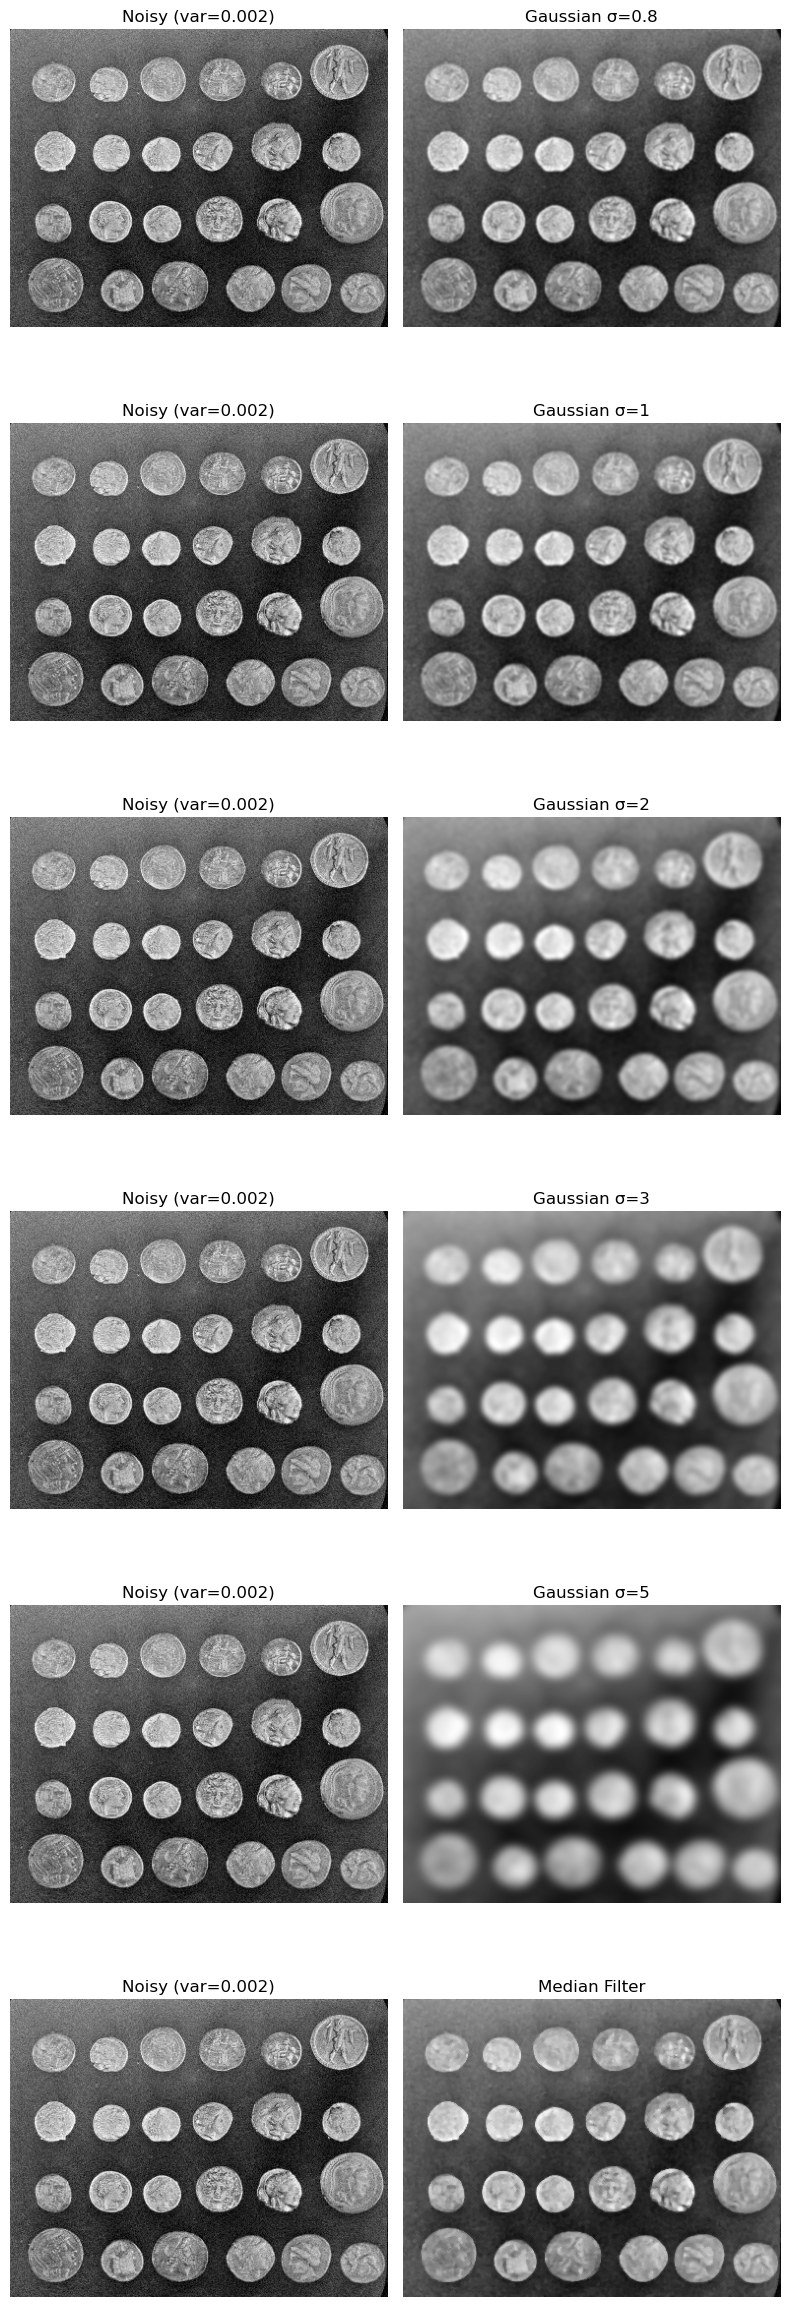

In [5]:
# Add reduced Gaussian noise
noisy = random_noise(coins, mode='gaussian', var=0.002)

# Define filter settings
sigmas = [0.8, 1, 2, 3, 5]

# Apply Gaussian blur for each sigma
gauss_filtered = [gaussian(noisy, sigma=s, preserve_range=True) for s in sigmas]

median_filtered = median(noisy, disk(2))

# Prepare subplots: one row per filter (including median), two columns (noisy + filtered)
n_rows = len(sigmas) + 1  # +1 for median
fig, axes = plt.subplots(n_rows, 2, figsize=(8, 4 * n_rows))

# Plot Gaussian results
for i, (s, img) in enumerate(zip(sigmas, gauss_filtered)):
    axes[i, 0].imshow(noisy, cmap='gray')
    axes[i, 0].set_title('Noisy (var=0.002)')
    axes[i, 0].axis('off')
    
    axes[i, 1].imshow(img, cmap='gray')
    axes[i, 1].set_title(f'Gaussian σ={s}')
    axes[i, 1].axis('off')

# Plot median result on last row
axes[-1, 0].imshow(noisy, cmap='gray')
axes[-1, 0].set_title('Noisy (var=0.002)')
axes[-1, 0].axis('off')

axes[-1, 1].imshow(median_filtered, cmap='gray')
axes[-1, 1].set_title('Median Filter')
axes[-1, 1].axis('off')

plt.tight_layout()
plt.show()

## 4. Segment the image using a k-means clustering algorithm with k=2 and represent the result

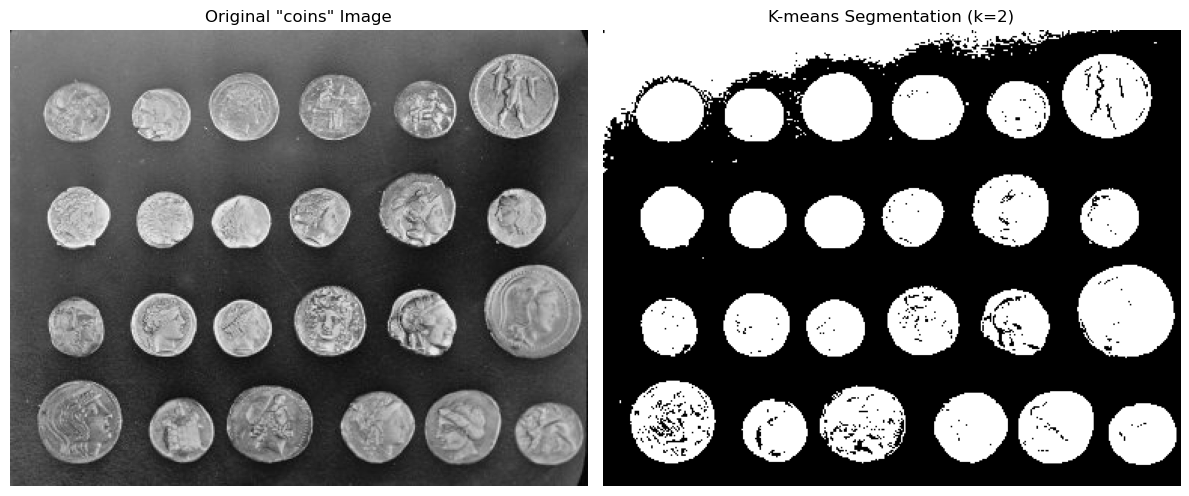

In [6]:
# Flatten image intensities for clustering
pixels = coins.reshape(-1, 1)

# Apply k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=0).fit(pixels)
labels = kmeans.labels_.reshape(coins.shape)

# Identify which cluster corresponds to coins (higher mean intensity)
centers = kmeans.cluster_centers_.flatten()
coins_label = np.argmax(centers)
mask = (labels == coins_label)

# Plot the original and segmented mask side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(coins, cmap='gray')
axes[0].set_title('Original "coins" Image')
axes[0].axis('off')

axes[1].imshow(mask, cmap='gray')
axes[1].set_title('K-means Segmentation (k=2)')
axes[1].axis('off')

plt.tight_layout()
plt.show()


## 5. Label the objects found in the image. Generate a figure with the original image and the labeled image. How many coins are there in the image?

We can add a bit of morphological operations to clear out noise pixels

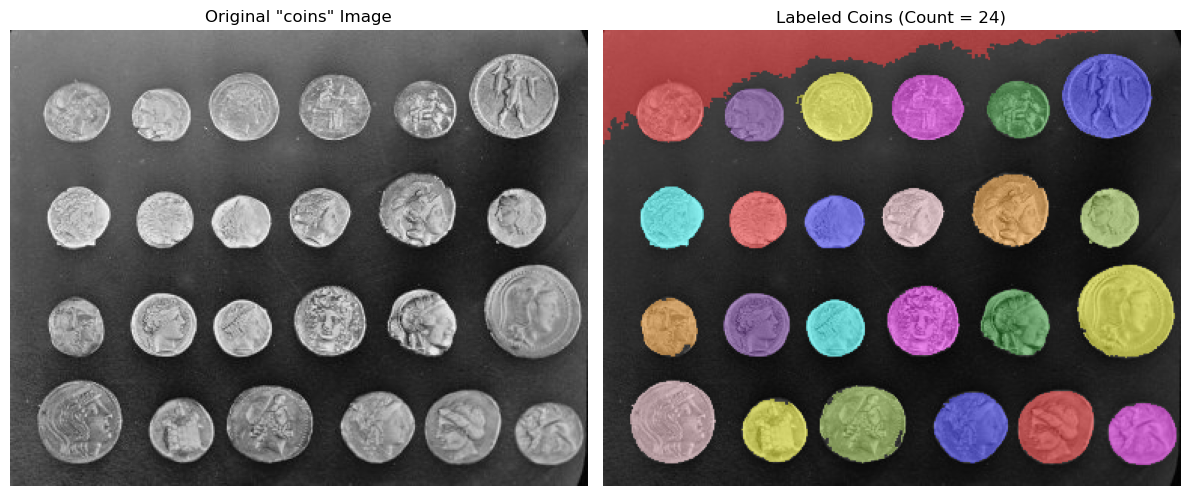

Number of coins detected: 24


In [7]:
X = coins.reshape(-1, 1)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_.reshape(coins.shape)

centers = kmeans.cluster_centers_.flatten()
foreground_label = np.argmax(centers)

binary = (labels == foreground_label)

binary_closed = morphology.closing(binary, morphology.square(2))
binary_filled = ndi.binary_fill_holes(binary_closed)
binary_cleaned = morphology.remove_small_objects(binary_filled, min_size=100)

labeled_coins = measure.label(binary_cleaned)
num_coins = labeled_coins.max()

labeled_rgb = color.label2rgb(labeled_coins, image=coins, bg_label=0, alpha=0.4)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(coins, cmap='gray')
plt.title('Original "coins" Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(labeled_rgb)
plt.title(f'Labeled Coins (Count = {num_coins})')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Number of coins detected:", num_coins)


## 6. Extract the area, major axis length and orientation of each coin. Report the average values of the extracted features. Represent a scatterplot of the area vs major axis length.  

Average Area: 1952.00
Average Major Axis Length: 57.65
Average Orientation: 9.59 degrees


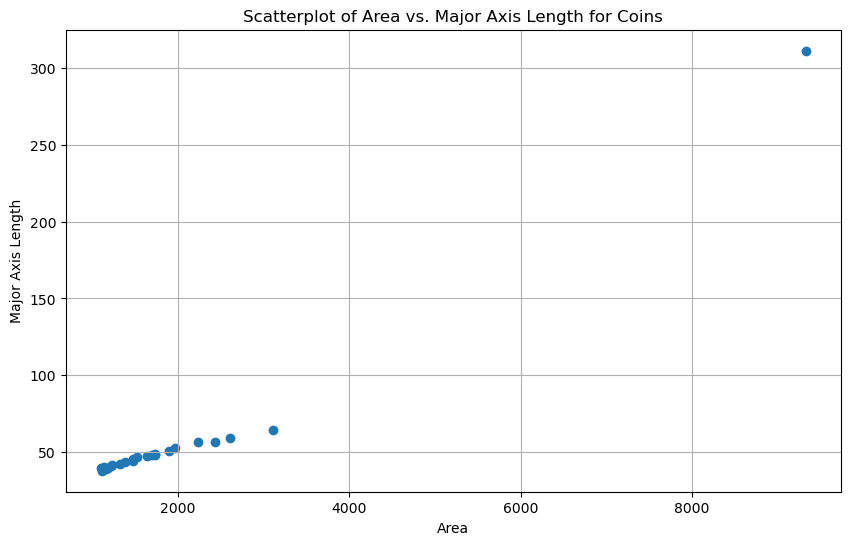

In [8]:
areas = []
major_axis_lengths = []
orientations = []

for region in measure.regionprops(labeled_coins):
    if region.area >= 100:
        areas.append(region.area)
        major_axis_lengths.append(region.major_axis_length)
        orientations.append(region.orientation) # Orientation in radians


average_area = np.mean(areas)
average_major_axis_length = np.mean(major_axis_lengths)
average_orientation_degrees = np.degrees(np.mean(orientations))

print(f"Average Area: {average_area:.2f}")
print(f"Average Major Axis Length: {average_major_axis_length:.2f}")
print(f"Average Orientation: {average_orientation_degrees:.2f} degrees")

plt.figure(figsize=(10, 6))
plt.scatter(areas, major_axis_lengths)
plt.title("Scatterplot of Area vs. Major Axis Length for Coins")
plt.xlabel("Area")
plt.ylabel("Major Axis Length")
plt.grid(True)
plt.show()

## 7. Using the labeled regions from the 'coins' image, how can I filter the regions to find those with an area greater than 1750 pixels, count how many such coins there are?

In [9]:
large_coin_areas = []

for region in measure.regionprops(labeled_coins):

    if region.area > 1750:
        large_coin_areas.append(region.area)

num_large_coins = len(large_coin_areas)

print(f"Number of coins with an area greater than 1750 pixels: {num_large_coins}")
print(f"Areas of these large coins: {large_coin_areas}")

Number of coins with an area greater than 1750 pixels: 7
Areas of these large coins: [9327.0, 2606.0, 1900.0, 3110.0, 2439.0, 2232.0, 1965.0]


## 8. Generate a 3-panel figure with the original image, the image with the little coins < 1750 coins (red color) and an image with the big coins > 1750 (blue color).

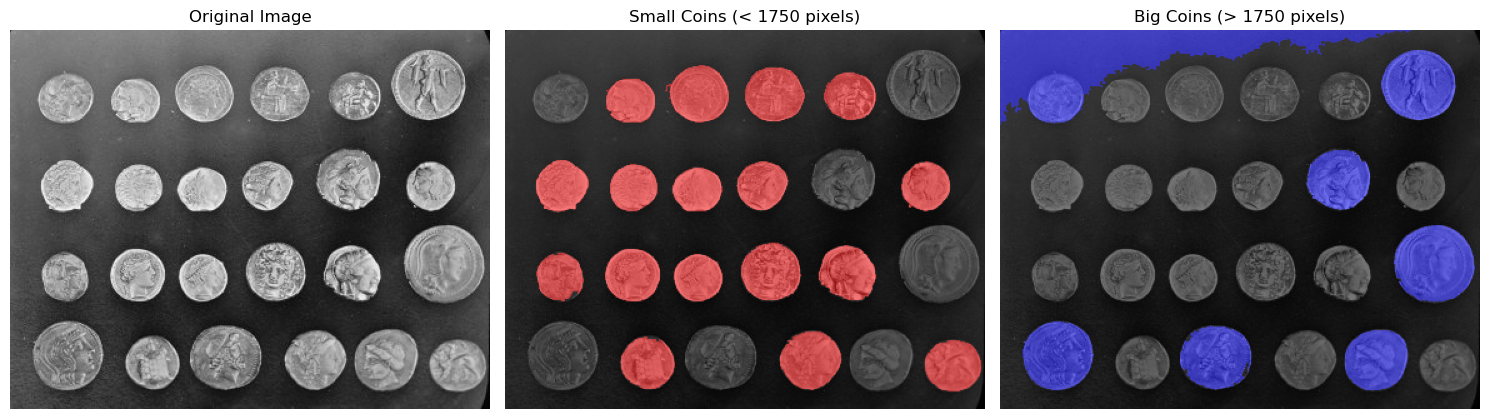

In [10]:
small_coins_overlay = np.zeros((coins.shape[0], coins.shape[1], 3), dtype=np.uint8)
large_coins_overlay = np.zeros((coins.shape[0], coins.shape[1], 3), dtype=np.uint8)

# Define colors (R, G, B)
RED = [255, 0, 0]
BLUE = [0, 0, 255]

for region in measure.regionprops(labeled_coins):
    if region.area < 1750:
        # For small coins, set the pixels in the red channel of small_coins_overlay
        for coord in region.coords:
            small_coins_overlay[coord[0], coord[1]] = RED
    elif region.area > 1750:
        # For large coins, set the pixels in the blue channel of large_coins_overlay
        for coord in region.coords:
            large_coins_overlay[coord[0], coord[1]] = BLUE


fig, axes = plt.subplots(1, 3, figsize=(15, 5))


axes[0].imshow(coins, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off') # Hide axes ticks and labels


axes[1].imshow(coins, cmap='gray') # Display original image in grayscale
axes[1].imshow(small_coins_overlay, alpha=0.5)
axes[1].set_title('Small Coins (< 1750 pixels)')
axes[1].axis('off')


axes[2].imshow(coins, cmap='gray') # Display original image in grayscale
axes[2].imshow(large_coins_overlay, alpha=0.5)
axes[2].set_title('Big Coins (> 1750 pixels)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

## 9. Describe the main steps required to perform  segmentation of an RGB image using an unsupervised clustering algorithm (use other algorithms different than K-Means and compare the results)

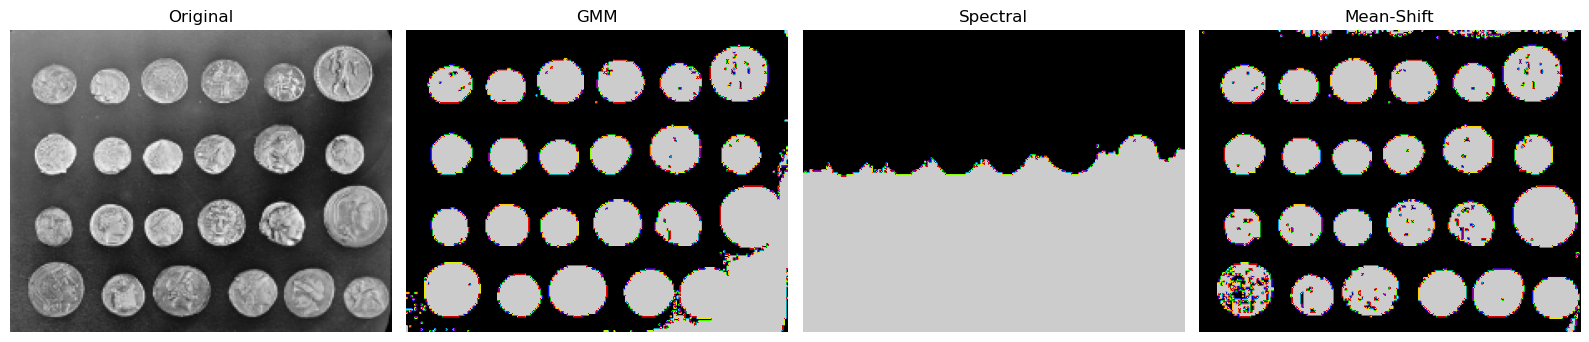

In [ ]:
# Load and downscale coins image (grayscale)
image = rescale(data.coins(), 0.6, anti_aliasing=True)
h, w = image.shape

pixels = image.reshape(-1, 1)
coords = np.indices((h, w)).transpose(1, 2, 0).reshape(-1, 2)
features = np.hstack((pixels, coords))
features = StandardScaler().fit_transform(features)

# Store results
results = {}

# GMM
gmm = GaussianMixture(n_components=2, random_state=0)
results['GMM'] = gmm.fit_predict(features).reshape(h, w)

# Spectral Clustering
spec = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans', random_state=0)
results['Spectral'] = spec.fit_predict(features).reshape(h, w)

# Mean-Shift
bandwidth = estimate_bandwidth(features, quantile=0.2, n_samples=300)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit_predict(features)
results['Mean-Shift'] = ms.reshape(h, w)

# Plot results
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original")
ax[0].axis("off")

for i, (name, segmented) in enumerate(results.items(), start=1):
    ax[i].imshow(segmented, cmap='nipy_spectral')
    ax[i].set_title(name)
    ax[i].axis("off")

plt.tight_layout()
plt.show()


## 10. Extract the main texture features of this image

First we extract averaged features.

In [12]:
if coins.ndim == 3:
    image_gray = img_as_ubyte(rgb2gray(coins))
else:
    image_gray = img_as_ubyte(coins)


distances = [1]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4] # 0, 45, 90, 135 degrees


glcm = graycomatrix(image_gray, distances=distances, angles=angles, levels=256,
                    symmetric=True, normed=True)



features = {}
properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']

for prop in properties:

    features[prop] = np.mean(graycoprops(glcm, prop))


print("Extracted GLCM Texture Features (averaged over angles):")
for prop, value in features.items():
    print(f"- {prop.capitalize()}: {value:.4f}")


Extracted GLCM Texture Features (averaged over angles):
- Contrast: 435.0948
- Dissimilarity: 10.4830
- Homogeneity: 0.2040
- Energy: 0.0179
- Correlation: 0.9224
- Asm: 0.0003


Than we extract Labeled region features and save to csv.

Texture features extracted for 24 regions and exported to: C:\Users\nikip\Desktop\try\Texture_features.csv


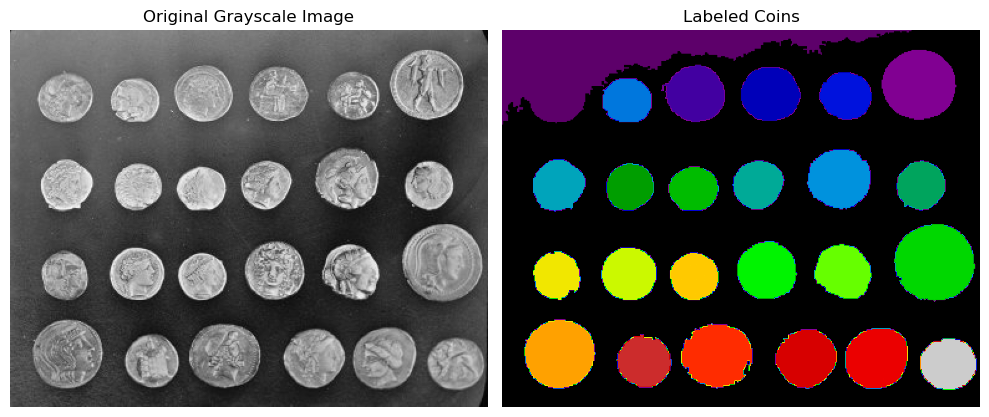

In [13]:
#sanity check first
if coins.ndim == 3:
    IG = img_as_ubyte(rgb2gray(coins))
else:
    IG = img_as_ubyte(coins)

props = measure.regionprops(labeled_coins, intensity_image=IG)
nregions = len(props)


props_texture = np.zeros((nregions, 5))


for i, p in enumerate(props):

    minr, minc, maxr, maxc = p.bbox
    I = IG[minr:maxr, minc:maxc]
    Iu8 = img_as_ubyte(I)
    g = graycomatrix(Iu8, distances=[1], angles=[0], levels=256, normed=True, symmetric=True)


    props_texture[i, 0] = graycoprops(g, 'contrast')[0, 0]
    props_texture[i, 1] = graycoprops(g, 'dissimilarity')[0, 0]
    props_texture[i, 2] = graycoprops(g, 'homogeneity')[0, 0]
    props_texture[i, 3] = graycoprops(g, 'energy')[0, 0]
    props_texture[i, 4] = graycoprops(g, 'correlation')[0, 0]


df = pd.DataFrame(props_texture, columns=['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation'])

output_csv_path = r"C:\Users\nikip\Desktop\try\Texture_features.csv" 
df.to_csv(output_csv_path, index=False)

print(f"Texture features extracted for {nregions} regions and exported to: {output_csv_path}")


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(IG, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')

axes[1].imshow(labeled_coins, cmap='nipy_spectral') # Use a colormap for labeled regions
axes[1].set_title('Labeled Coins')
axes[1].axis('off')
plt.tight_layout()
plt.show()

Quick display of the df so you need not open the csv.

In [14]:
df

Contrast  Dissimilarity  Homogeneity    Energy  Correlation
0    286.241816       8.119384     0.301742  0.031812     0.887150
1    995.526634      21.321429     0.086937  0.017297     0.765693
2    521.100000      13.826087     0.124086  0.023317     0.820461
3    577.133102      16.666007     0.083029  0.020208     0.784722
4   1028.797176      21.617458     0.076587  0.021379     0.736437
5    561.821053      15.009023     0.099207  0.026133     0.800590
6    891.572083      19.571250     0.075520  0.018196     0.845380
7    784.764808      17.322300     0.097732  0.022090     0.857712
8   1067.844278      20.778612     0.072951  0.021424     0.832012
9    948.079605      18.903289     0.085836  0.023050     0.873162
10   700.980085      15.964438     0.088606  0.024473     0.881167
11   886.335531      17.128205     0.099959  0.025219     0.866586
12   459.778478      13.575857     0.123772  0.019072     0.891341
13  1216.811748      24.425994     0.063135  0.018260     0.805695
14  1255.131818      23.015657     0.079067  0.019658     0.843770
15  1111.551495      21.356589     0.071666  0.020814     0.822710
16   762.969508      18.090783     0.076610  0.022621     0.816011
17  1072.224377      20.451524     0.075977  0.023036     0.849634
18   614.473377      17.424675     0.075056  0.017743     0.769254
19   513.121909      15.408997     0.094019  0.019040     0.872599
20   329.792092      11.480017     0.121271  0.022586     0.905886
21   428.130762      13.391401     0.106752  0.022048     0.920394
22   740.002769      17.286268     0.094242  0.021456     0.867842
23   262.268293      11.611973     0.096339  0.023557     0.911431

## Personal discussion

Provide a thoughtful reflection on the Computer Vision course, including your perspective on the knowledge you have acquired and your opinion about the professor. (Thank you very much for your feedback!)

The course was short but great. I am already well introduced with the field of CV as it is my passion but the Git Repo is great!!!